In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/hippocampus.zip

Streaming output truncated to the last 5000 lines.
  inflating: schizophrenic_slices/hippocampus_101_slice_6.png  
  inflating: schizophrenic_slices/hippocampus_101_slice_7.png  
  inflating: schizophrenic_slices/hippocampus_101_slice_8.png  
  inflating: schizophrenic_slices/hippocampus_101_slice_9.png  
  inflating: schizophrenic_slices/hippocampus_101_slice_10.png  
  inflating: schizophrenic_slices/hippocampus_101_slice_11.png  
  inflating: schizophrenic_slices/hippocampus_101_slice_12.png  
  inflating: schizophrenic_slices/hippocampus_101_slice_13.png  
  inflating: schizophrenic_slices/hippocampus_101_slice_14.png  
  inflating: schizophrenic_slices/hippocampus_101_slice_15.png  
  inflating: schizophrenic_slices/hippocampus_101_slice_16.png  
  inflating: schizophrenic_slices/hippocampus_101_slice_17.png  
  inflating: schizophrenic_slices/hippocampus_101_slice_18.png  
  inflating: schizophrenic_slices/hippocampus_101_slice_19.png  
  inflating: schizophrenic_slices/hippocamp

In [ ]:
import os
import shutil

# Paths to existing folders
healthy_path = "/content/healthy_slices"
schizophrenic_path = "/content/schizophrenic_slices"

# Path to the new folder
final_data_path = "/content/final_data"

# Create the 'final_data' folder if it doesn't exist
os.makedirs(final_data_path, exist_ok=True)

# Move the 'healthy_slices' and 'schizophrenic_slices' folders into 'final_data'
shutil.move(healthy_path, final_data_path)
shutil.move(schizophrenic_path, final_data_path)

print(f"All folders have been moved to {final_data_path}.")

All folders have been moved to /content/final_data.


In [ ]:
import PIL

In [ ]:
img = PIL.Image.open("/content/final_data/healthy_slices/hippocampus_001_slice_31.png")

In [ ]:
img.size

(51, 35)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
dataset_dir = '/content/final_data'

In [ ]:
datagen=ImageDataGenerator(
                           rescale=1./255.,
                        )

In [ ]:
# Define image size and batch size
IMAGE_SIZE = (32, 32)
BATCH_SIZE = 4

In [ ]:
train_dataset = datagen.flow_from_directory(
    dataset_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    color_mode='grayscale',
)

Found 9270 images belonging to 2 classes.


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Get the class labels from the dataset
labels = train_dataset.classes
class_names = list(train_dataset.class_indices.keys())

In [ ]:
print(class_names)

['healthy_slices', 'schizophrenic_slices']


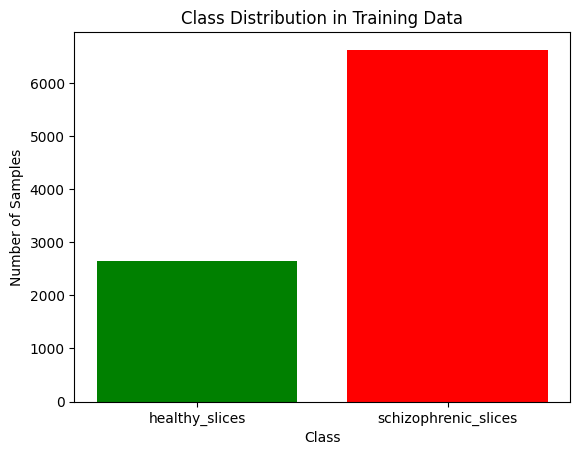

In [ ]:
# Example class names and counts
class_names = ['healthy_slices', 'schizophrenic_slices']
class_counts = np.bincount(labels)

# Plot the distribution with specified colors
colors = ['green', 'red']  # Healthy is green, Schizophrenic is red
plt.bar(class_names, class_counts, color=colors)

# Add titles and labels
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Number of Samples')

# Display the plot
plt.show()



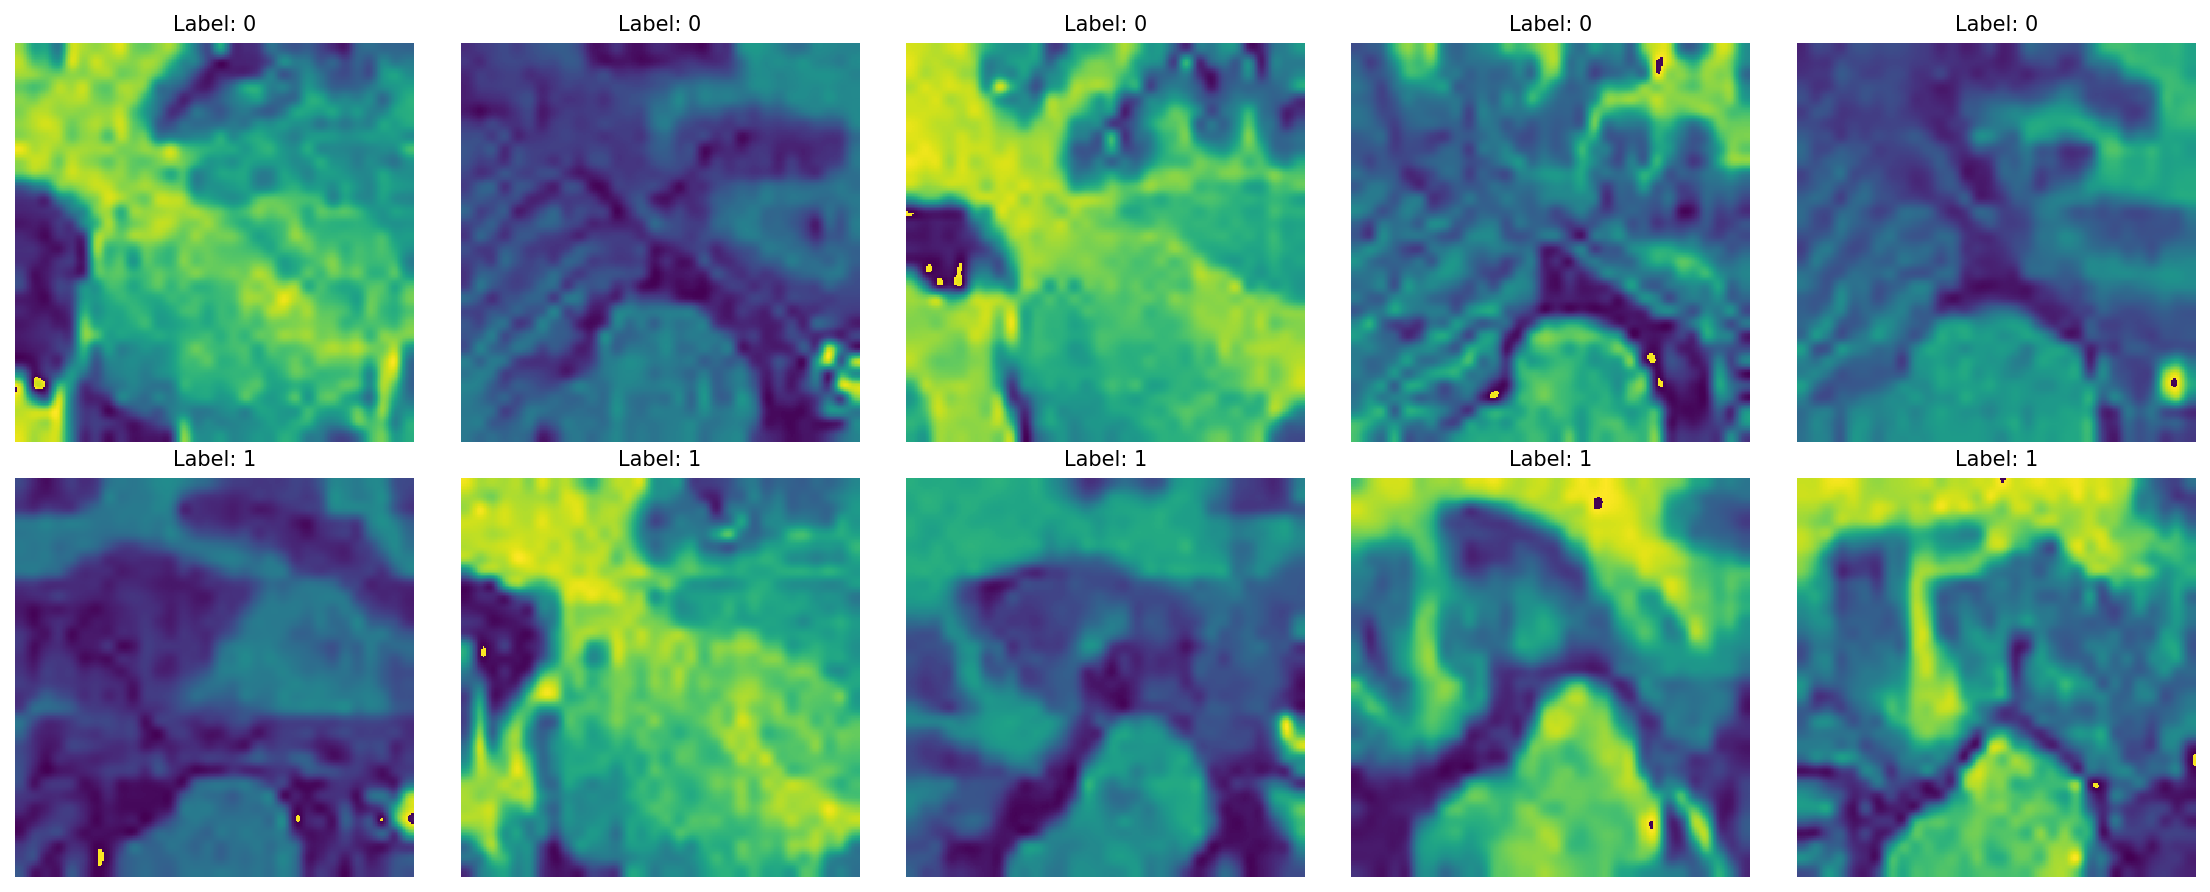

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def plot_balanced_images(dataset, num_samples=5, upsample_size=(256, 256)):
    #Plot a balanced batch of healthy (0) and schizophrenic (1) images

    # Lists to store images and labels
    healthy_images, schizo_images = [], []

    # Iterate through dataset batches
    for batch_data, batch_labels in dataset:
        # Convert to NumPy if necessary
        if not isinstance(batch_data, np.ndarray):
            batch_data = batch_data.numpy()
        if not isinstance(batch_labels, np.ndarray):
            batch_labels = batch_labels.numpy()

        # Normalize images if necessary
        if batch_data.max() > 1:
            batch_data = batch_data / batch_data.max()

        # Separate images by label
        for img, label in zip(batch_data, batch_labels):
            if label == 0 and len(healthy_images) < num_samples:
                healthy_images.append(img)
            elif label == 1 and len(schizo_images) < num_samples:
                schizo_images.append(img)

            # Stop once we have enough samples
            if len(healthy_images) == num_samples and len(schizo_images) == num_samples:
                break
        if len(healthy_images) == num_samples and len(schizo_images) == num_samples:
            break

    # Combine selected images and labels
    selected_images = np.array(healthy_images + schizo_images)
    selected_labels = np.array([0] * num_samples + [1] * num_samples)

    # Plot images
    plt.figure(figsize=(15, 6), dpi=150)
    for i in range(len(selected_images)):
        ax = plt.subplot(2, num_samples, i + 1)

        # Upsample using bicubic interpolation
        upsampled_image = tf.image.resize(
            selected_images[i],
            upsample_size,
            method='bicubic'
        ).numpy()

        # Convert to 8-bit for better visualization
        upsampled_image = (upsampled_image * 255).astype(np.uint8)

        # Display image
        if upsampled_image.shape[-1] == 1:  # Grayscale
            plt.imshow(upsampled_image.squeeze(), cmap='viridis', interpolation='nearest')
        else:  # RGB
            plt.imshow(upsampled_image, interpolation='nearest')

        plt.title(f"Label: {selected_labels[i]}", fontsize=10)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Call function to visualize 5 healthy and 5 schizophrenic images
plot_balanced_images(train_dataset)


In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,  # Use a portion of the data for validation
    subset="training",  # Specify the subset
    seed=42,  # Seed for reproducibility
    image_size=IMAGE_SIZE,  # Resize images
    batch_size=BATCH_SIZE, # Number of images per batch
    color_mode='rgb'
)


Found 9270 files belonging to 2 classes.
Using 7416 files for training.


In [ ]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMAGE_SIZE,  # Resize images
    batch_size=BATCH_SIZE,
    color_mode='rgb'
)


Found 9270 files belonging to 2 classes.
Using 1854 files for validation.


In [ ]:
from tensorflow.keras.applications.vgg19 import preprocess_input

In [ ]:
def preprocess_dataset(dataset):
    return dataset.map(lambda x, y: (preprocess_input(x), y))

In [ ]:
train_dataset = preprocess_dataset(train_dataset)
test_dataset = preprocess_dataset(test_dataset)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

**CHANNEL ATTENTION**

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Layer, GlobalAveragePooling2D, GlobalMaxPooling2D, Multiply, Add, Reshape, Activation, Bidirectional, GRU, PReLU, Input # Import Input here
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
import seaborn as sns
from keras.regularizers import l2

# Channel Attention Layer
class ChannelAttention(layers.Layer):
    def __init__(self, filters=128, reduction_ratio=16):
        super(ChannelAttention, self).__init__()
        self.global_avg_pool = layers.GlobalAveragePooling2D()
        self.dense1 = layers.Dense(filters // reduction_ratio, activation='relu')
        self.dense2 = layers.Dense(filters, activation='sigmoid')

    def call(self, inputs):
        avg_out = self.global_avg_pool(inputs)
        avg_out = self.dense1(avg_out)
        avg_out = self.dense2(avg_out)
        return inputs * tf.reshape(avg_out, [-1, 1, 1, inputs.shape[-1]])

# Improved CNN Model for MRI
def build_improved_cnn(input_shape):
    inputs = Input(shape=input_shape)

    # Conv Block 1
    x = Conv2D(32, (3, 3), padding='same')(inputs)
    x = PReLU()(x)
    x = Conv2D(32, (3, 3), padding='same')(x)
    x = PReLU()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.3)(x)

    # Conv Block 2
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = PReLU()(x)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = PReLU()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.3)(x)

    # Conv Block 3
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = PReLU()(x)
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = PReLU()(x)
    x = MaxPooling2D((2, 2))(x)

    # Flatten before BiGRU
    x = Flatten()(x)

    # Reshape for BiGRU Input
    x = Reshape((-1, 128))(x)  # Let TensorFlow infer the batch size

    # Apply BiGRU
    x = Bidirectional(GRU(128, return_sequences=True))(x)  # Output: (batch_size, sequence_length, 256)

    # Reshape before Channel Attention (adding spatial dimension)
    x = Reshape((-1, 1, 128))(x)  # Keeps the correct total number of elements

    # Apply Channel Attention
    x = ChannelAttention(filters=128)(x)

    # Reshape after Channel Attention back to 3D
    x = Reshape((-1, 128))(x)

    # Flatten before Dense layers
    x = Flatten()(x)

    # Fully Connected Layers
    x = Dense(128)(x)
    x = PReLU()(x)
    x = Dense(128)(x)
    x = PReLU()(x)
    x = Dense(128)(x)
    x = PReLU()(x)
    x = Dense(256)(x)
    x = PReLU()(x)
    x = Dropout(0.5)(x)

    outputs = Dense(1, activation='sigmoid')(x)  # Binary classification

    model = models.Model(inputs, outputs)
    return model

# Define input shape and build model
input_shape = (32, 32, 3)
model = build_improved_cnn(input_shape)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu (PReLU)                      │ (None, 32, 32, 32)          │          32,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_1 (PReLU)                    │ (None, 32, 32, 32)          │          32,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_2 (PReLU)                    │ (None, 16, 16, 64)          │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_3 (PReLU)                    │ (None, 16, 16, 64)          │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_4 (PReLU)                    │ (None, 8, 8, 128)           │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_5 (PReLU)                    │ (None, 8, 8, 128)           │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 16, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 16, 256)             │         198,144 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,193,385 (4.55 MB)

 Trainable params: 1,193,385 (4.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.7396 - loss: 0.5089 - val_accuracy: 0.9088 - val_loss: 0.2135
Epoch 2/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9000 - loss: 0.2324 - val_accuracy: 0.9261 - val_loss: 0.1713
Epoch 3/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9246 - loss: 0.1885 - val_accuracy: 0.9299 - val_loss: 0.1580
Epoch 4/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9350 - loss: 0.1637 - val_accuracy: 0.9401 - val_loss: 0.1388
Epoch 5/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9417 - loss: 0.1530 - val_accuracy: 0.9509 - val_loss: 0.1208
Epoch 6/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9448 - loss: 0.1378 - val_accuracy: 0.9536 - val_loss: 0.1128
Epoch 7/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9493 - loss: 0.1255 - val_accuracy: 0.9504 - val_loss: 0.1119
Epoch 8/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9519 - loss: 0.1140 -

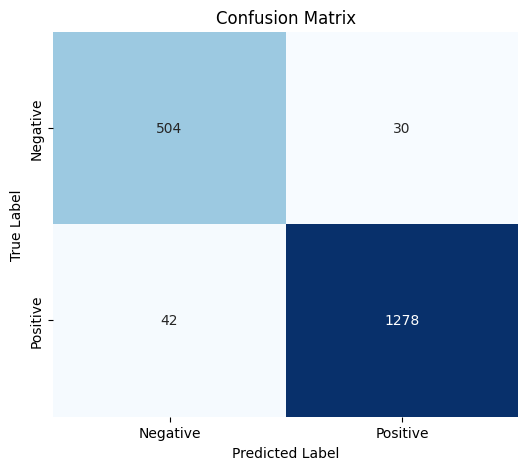

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Get all images and labels as NumPy arrays
X_train, y_train = [], []
for images, labels in train_dataset.as_numpy_iterator():
    X_train.extend(images)
    y_train.extend(labels)

X_train = np.array(X_train)
y_train = np.array(y_train)

# Get all test images and labels as NumPy arrays
X_test, y_test = [], []
for images, labels in test_dataset.as_numpy_iterator():
    X_test.extend(images)
    y_test.extend(labels)

X_test = np.array(X_test)
y_test = np.array(y_test)

# Define optimizer
optimizer = Adam(learning_rate=0.0001)

# Initialize callbacks
early_stopping = EarlyStopping(monitor="accuracy", patience=5, restore_best_weights=True)

# Create TensorFlow Datasets
train_dataset_tf = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
test_dataset_tf = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

# Compile model
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(
    train_dataset_tf,
    validation_data=test_dataset_tf,
    epochs=100,
    callbacks=[early_stopping]
)

# Get training metrics
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Evaluate on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-score: {f1:.4f}")

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'],
            cbar=False)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


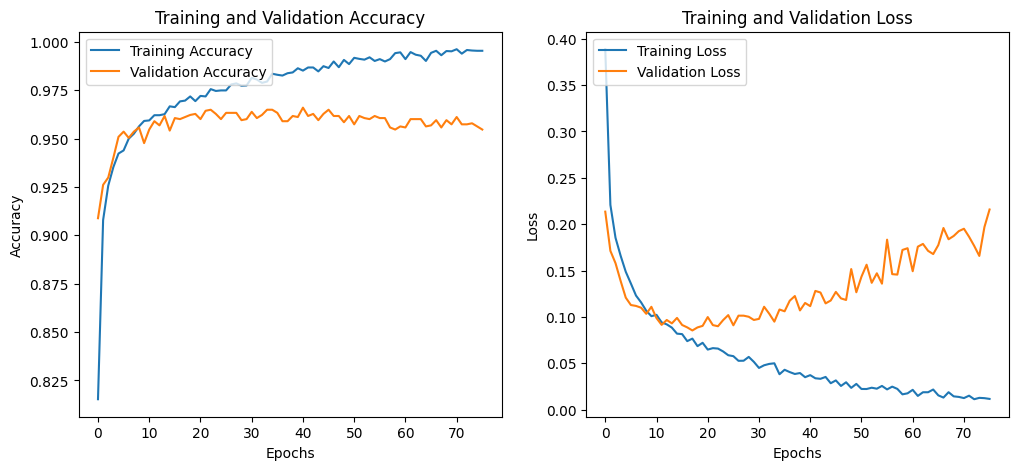

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
plt.show()

**SELF ATTENTION**

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Layer, Reshape, Activation, Bidirectional, GRU, PReLU, Input, Softmax
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
import seaborn as sns
from keras.regularizers import l2

# Self-Attention Layer
class SelfAttention(layers.Layer):
    def __init__(self, filters=128):
        super(SelfAttention, self).__init__()
        self.filters = filters
        self.query = layers.Dense(filters)
        self.key = layers.Dense(filters)
        self.value = layers.Dense(filters)
        self.projection = layers.Dense(filters * 2)  # Match input dimension
        self.add = layers.Add()
        self.norm = layers.LayerNormalization()

    def build(self, input_shape):
        self.seq_length = input_shape[1]

    def call(self, inputs):
        q = self.query(inputs)
        k = self.key(inputs)
        v = self.value(inputs)

        attn_weights = tf.nn.softmax(tf.einsum('bij,bkj->bik', q, k) / tf.sqrt(tf.cast(self.filters, tf.float32)), axis=-1)
        attn_output = tf.einsum('bij,bjk->bik', attn_weights, v)

        attn_output = self.projection(attn_output)  # Ensure same shape as inputs
        out = self.add([inputs, attn_output])
        return self.norm(out)

# Improved CNN Model for MRI
def build_improved_cnn(input_shape):
    inputs = Input(shape=input_shape)

    # Conv Block 1
    x = Conv2D(32, (3, 3), padding='same')(inputs)
    x = PReLU()(x)
    x = Conv2D(32, (3, 3), padding='same')(x)
    x = PReLU()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.3)(x)

    # Conv Block 2
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = PReLU()(x)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = PReLU()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.3)(x)

    # Conv Block 3
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = PReLU()(x)
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = PReLU()(x)
    x = MaxPooling2D((2, 2))(x)

    # Flatten before BiGRU
    x = Flatten()(x)

    # Reshape for BiGRU Input
    x = Reshape((-1, 128))(x)  # Let TensorFlow infer the batch size

    # Apply BiGRU
    x = Bidirectional(GRU(128, return_sequences=True))(x)  # Output: (batch_size, sequence_length, 256)

    # Apply Self-Attention
    x = SelfAttention(filters=128)(x)

    # Flatten before Dense layers
    x = Flatten()(x)

    # Fully Connected Layers
    x = Dense(128)(x)
    x = PReLU()(x)
    x = Dense(128)(x)
    x = PReLU()(x)
    x = Dense(128)(x)
    x = PReLU()(x)
    x = Dense(256)(x)
    x = PReLU()(x)
    x = Dropout(0.5)(x)

    outputs = Dense(1, activation='sigmoid')(x)  # Binary classification

    model = models.Model(inputs, outputs)
    return model

# Define input shape and build model
input_shape = (32, 32, 3)
model = build_improved_cnn(input_shape)
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_10 (PReLU)                   │ (None, 32, 32, 32)          │          32,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_11 (PReLU)                   │ (None, 32, 32, 32)          │          32,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_12 (PReLU)                   │ (None, 16, 16, 64)          │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_13 (PReLU)                   │ (None, 16, 16, 64)          │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_14 (PReLU)                   │ (None, 8, 8, 128)           │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_15 (PReLU)                   │ (None, 8, 8, 128)           │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_3 (Reshape)                  │ (None, 16, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 16, 256)             │         198,144 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,323,425 (5.05 MB)

 Trainable params: 1,323,425 (5.05 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.7516 - loss: 0.5033 - val_accuracy: 0.8916 - val_loss: 0.2427
Epoch 2/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8897 - loss: 0.2555 - val_accuracy: 0.9196 - val_loss: 0.1976
Epoch 3/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9155 - loss: 0.2068 - val_accuracy: 0.9239 - val_loss: 0.1660
Epoch 4/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9243 - loss: 0.1833 - val_accuracy: 0.9374 - val_loss: 0.1494
Epoch 5/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9328 - loss: 0.1695 - val_accuracy: 0.9450 - val_loss: 0.1322
Epoch 6/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9393 - loss: 0.1466 - val_accuracy: 0.9455 - val_loss: 0.1267
Epoch 7/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9471 - loss: 0.1358 - val_accuracy: 0.9504 - val_loss: 0.1180
Epoch 8/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9485 - loss: 0.1266 -

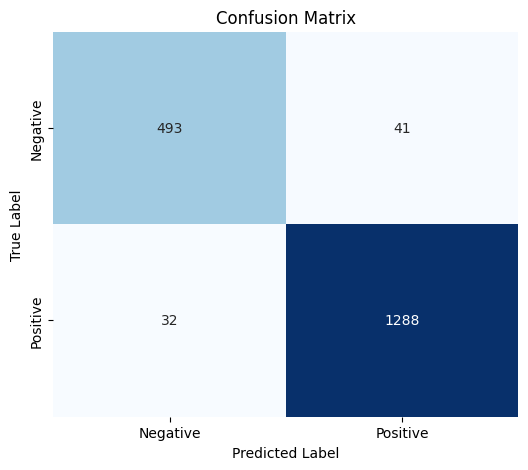

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Get all images and labels as NumPy arrays
X_train, y_train = [], []
for images, labels in train_dataset.as_numpy_iterator():
    X_train.extend(images)
    y_train.extend(labels)

X_train = np.array(X_train)
y_train = np.array(y_train)

# Get all test images and labels as NumPy arrays
X_test, y_test = [], []
for images, labels in test_dataset.as_numpy_iterator():
    X_test.extend(images)
    y_test.extend(labels)

X_test = np.array(X_test)
y_test = np.array(y_test)

# Define optimizer
optimizer = Adam(learning_rate=0.0001)

# Initialize callbacks
early_stopping = EarlyStopping(monitor="accuracy", patience=5, restore_best_weights=True)

# Create TensorFlow Datasets
train_dataset_tf = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
test_dataset_tf = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

# Compile model
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(
    train_dataset_tf,
    validation_data=test_dataset_tf,
    epochs=100,
    callbacks=[early_stopping]
)

# Get training metrics
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Evaluate on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-score: {f1:.4f}")

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'],
            cbar=False)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


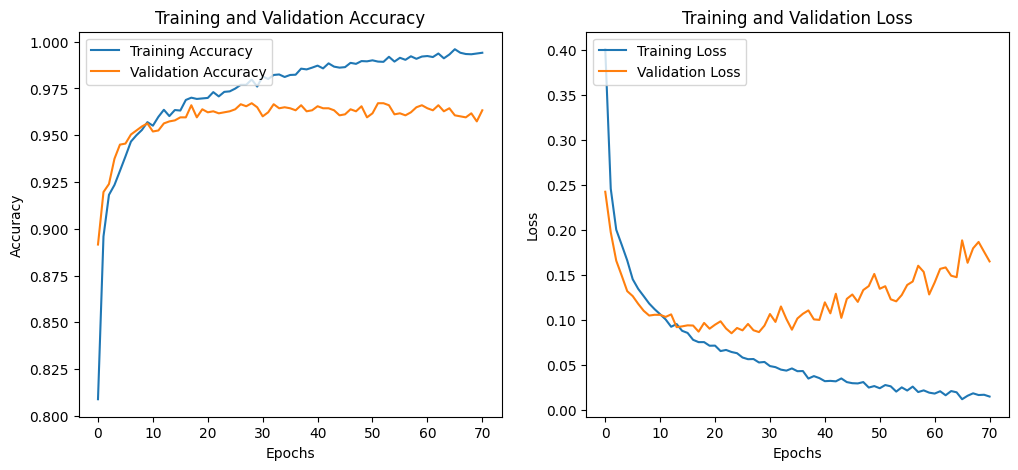

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
plt.show()

**SPATIAL ATTENTION**

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Layer, GlobalAveragePooling2D, GlobalMaxPooling2D, Multiply, Add, Reshape, Activation, Bidirectional, GRU, PReLU, Input
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
import seaborn as sns
from keras.regularizers import l2

# Spatial Attention Layer
class SpatialAttention(layers.Layer):
    def __init__(self, filters=128):
        super(SpatialAttention, self).__init__()
        self.conv = layers.Conv2D(filters, kernel_size=3, padding="same", activation='sigmoid')

    def call(self, inputs):
        attention = self.conv(inputs)
        return inputs * attention

# Improved CNN Model for MRI with Spatial Attention
def build_improved_cnn(input_shape):
    inputs = Input(shape=input_shape)

    # Conv Block 1
    x = Conv2D(32, (3, 3), padding='same')(inputs)
    x = PReLU()(x)
    x = Conv2D(32, (3, 3), padding='same')(x)
    x = PReLU()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.3)(x)

    # Conv Block 2
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = PReLU()(x)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = PReLU()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.3)(x)

    # Conv Block 3
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = PReLU()(x)
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = PReLU()(x)
    x = MaxPooling2D((2, 2))(x)

    # Flatten before BiGRU
    x = Flatten()(x)

    # Reshape for BiGRU Input
    x = Reshape((-1, 128))(x)

    # Apply BiGRU
    x = Bidirectional(GRU(128, return_sequences=True))(x)

    # Reshape before Spatial Attention
    x = Reshape((-1, 1, 128))(x)

    # Apply Spatial Attention
    x = SpatialAttention()(x)

    # Flatten before Dense layers
    x = Flatten()(x)

    # Fully Connected Layers
    x = Dense(128)(x)
    x = PReLU()(x)
    x = Dense(128)(x)
    x = PReLU()(x)
    x = Dense(128)(x)
    x = PReLU()(x)
    x = Dense(256)(x)
    x = PReLU()(x)
    x = Dropout(0.5)(x)

    outputs = Dense(1, activation='sigmoid')(x)  # Binary classification

    model = models.Model(inputs, outputs)
    return model

# Define input shape and build model
input_shape = (32, 32, 3)
model = build_improved_cnn(input_shape)
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_20 (PReLU)                   │ (None, 32, 32, 32)          │          32,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_21 (PReLU)                   │ (None, 32, 32, 32)          │          32,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_22 (PReLU)                   │ (None, 16, 16, 64)          │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_23 (PReLU)                   │ (None, 16, 16, 64)          │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_24 (PReLU)                   │ (None, 8, 8, 128)           │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_25 (PReLU)                   │ (None, 8, 8, 128)           │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_4 (Reshape)                  │ (None, 16, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 16, 256)             │         198,144 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,338,785 (5.11 MB)

 Trainable params: 1,338,785 (5.11 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.7657 - loss: 0.4744 - val_accuracy: 0.9218 - val_loss: 0.2064
Epoch 2/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9025 - loss: 0.2335 - val_accuracy: 0.9245 - val_loss: 0.1713
Epoch 3/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9231 - loss: 0.1885 - val_accuracy: 0.9358 - val_loss: 0.1537
Epoch 4/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9316 - loss: 0.1642 - val_accuracy: 0.9417 - val_loss: 0.1381
Epoch 5/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9397 - loss: 0.1448 - val_accuracy: 0.9504 - val_loss: 0.1185
Epoch 6/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9450 - loss: 0.1336 - val_accuracy: 0.9509 - val_loss: 0.1105
Epoch 7/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9475 - loss: 0.1260 - val_accuracy: 0.9536 - val_loss: 0.1074
Epoch 8/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9516 - loss: 0.1151 -

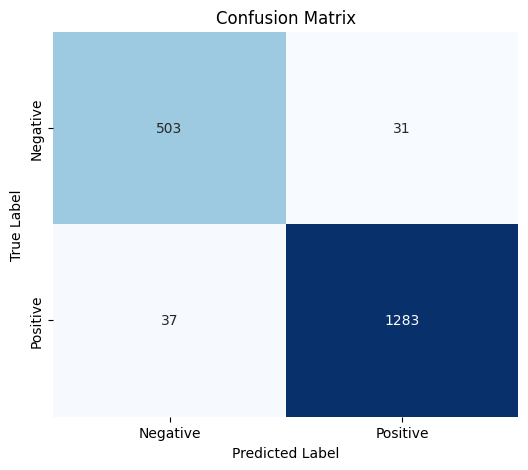

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Get all images and labels as NumPy arrays
X_train, y_train = [], []
for images, labels in train_dataset.as_numpy_iterator():
    X_train.extend(images)
    y_train.extend(labels)

X_train = np.array(X_train)
y_train = np.array(y_train)

# Get all test images and labels as NumPy arrays
X_test, y_test = [], []
for images, labels in test_dataset.as_numpy_iterator():
    X_test.extend(images)
    y_test.extend(labels)

X_test = np.array(X_test)
y_test = np.array(y_test)

# Define optimizer
optimizer = Adam(learning_rate=0.0001)

# Initialize callbacks
early_stopping = EarlyStopping(monitor="accuracy", patience=5, restore_best_weights=True)

# Create TensorFlow Datasets
train_dataset_tf = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
test_dataset_tf = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

# Compile model
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(
    train_dataset_tf,
    validation_data=test_dataset_tf,
    epochs=100,
    callbacks=[early_stopping]
)

# Get training metrics
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Evaluate on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-score: {f1:.4f}")

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'],
            cbar=False)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


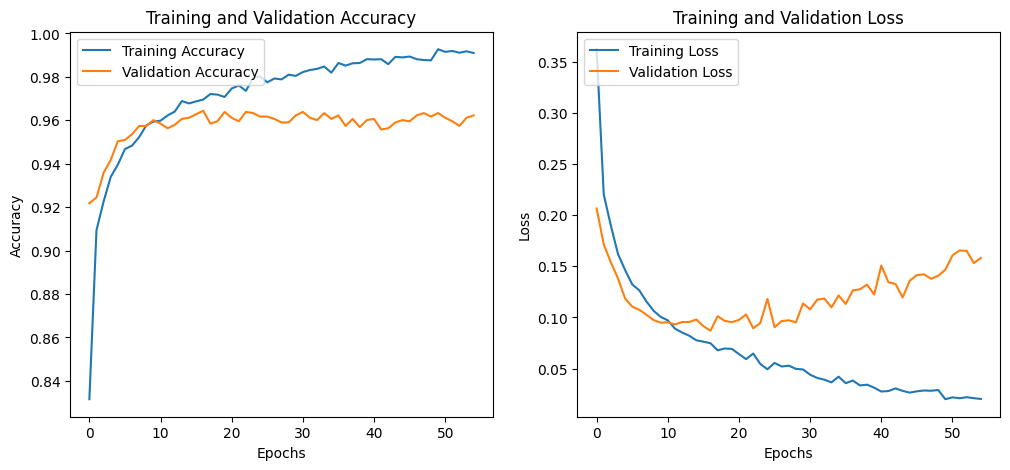

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
plt.show()

**TEMPORAL ATTENTION**

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Reshape, Bidirectional, GRU, PReLU, Input, Multiply, Activation
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
import seaborn as sns

# Temporal Attention Layer
class TemporalAttention(layers.Layer):
    def __init__(self, attention_units=128):
        super(TemporalAttention, self).__init__()
        self.attention_dense1 = layers.Dense(attention_units, activation='tanh')
        self.attention_dense2 = layers.Dense(attention_units, activation='softmax')
        self.expand_dense = layers.Dense(256, activation=None)  # To match BiGRU output

    def call(self, inputs):
        attention_scores = self.attention_dense1(inputs)  # Shape: (batch, seq_len, 128)
        attention_scores = self.attention_dense2(attention_scores)  # Shape: (batch, seq_len, 128)
        attention_scores = self.expand_dense(attention_scores)  # Shape: (batch, seq_len, 256)
        return Multiply()([inputs, attention_scores])  # Apply attention

# Improved CNN Model with Temporal Attention
def build_improved_cnn(input_shape):
    inputs = Input(shape=input_shape)

    # Conv Block 1
    x = Conv2D(32, (3, 3), padding='same')(inputs)
    x = PReLU()(x)
    x = Conv2D(32, (3, 3), padding='same')(x)
    x = PReLU()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.3)(x)

    # Conv Block 2
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = PReLU()(x)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = PReLU()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.3)(x)

    # Conv Block 3
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = PReLU()(x)
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = PReLU()(x)
    x = MaxPooling2D((2, 2))(x)

    # Flatten before BiGRU
    x = Flatten()(x)

    # Reshape for BiGRU Input
    x = Reshape((-1, 128))(x)  # Let TensorFlow infer the batch size

    # Apply BiGRU
    x = Bidirectional(GRU(128, return_sequences=True))(x)  # Output: (batch_size, sequence_length, 256)

    # Apply Temporal Attention
    x = TemporalAttention(attention_units=128)(x)

    # Flatten before Dense layers
    x = Flatten()(x)

    # Fully Connected Layers
    x = Dense(128)(x)
    x = PReLU()(x)
    x = Dense(128)(x)
    x = PReLU()(x)
    x = Dense(128)(x)
    x = PReLU()(x)
    x = Dense(256)(x)
    x = PReLU()(x)
    x = Dropout(0.5)(x)

    outputs = Dense(1, activation='sigmoid')(x)  # Binary classification

    model = models.Model(inputs, outputs)
    return model

# Define input shape and build model
input_shape = (32, 32, 3)
model = build_improved_cnn(input_shape)
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_30 (PReLU)                   │ (None, 32, 32, 32)          │          32,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_31 (PReLU)                   │ (None, 32, 32, 32)          │          32,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_32 (PReLU)                   │ (None, 16, 16, 64)          │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_33 (PReLU)                   │ (None, 16, 16, 64)          │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_34 (PReLU)                   │ (None, 8, 8, 128)           │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_35 (PReLU)                   │ (None, 8, 8, 128)           │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_6 (Reshape)                  │ (None, 16, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 16, 256)             │         198,144 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,273,633 (4.86 MB)

 Trainable params: 1,273,633 (4.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.7291 - loss: 0.5694 - val_accuracy: 0.9018 - val_loss: 0.2576
Epoch 2/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8914 - loss: 0.2611 - val_accuracy: 0.9169 - val_loss: 0.2061
Epoch 3/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9113 - loss: 0.2153 - val_accuracy: 0.9283 - val_loss: 0.1664
Epoch 4/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9267 - loss: 0.1886 - val_accuracy: 0.9315 - val_loss: 0.1546
Epoch 5/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9344 - loss: 0.1621 - val_accuracy: 0.9471 - val_loss: 0.1348
Epoch 6/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9405 - loss: 0.1450 - val_accuracy: 0.9504 - val_loss: 0.1262
Epoch 7/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9443 - loss: 0.1355 - val_accuracy: 0.9482 - val_loss: 0.1259
Epoch 8/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9501 - loss: 0.1233 -

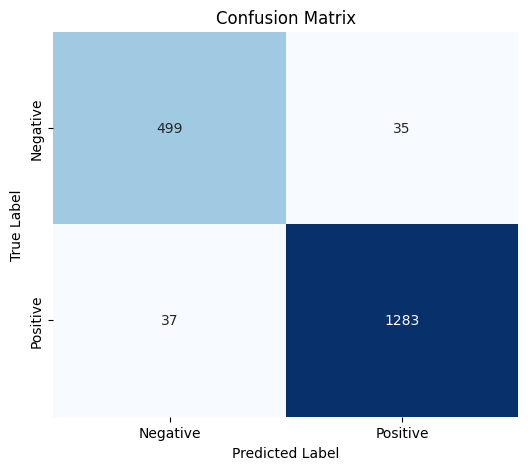

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Get all images and labels as NumPy arrays
X_train, y_train = [], []
for images, labels in train_dataset.as_numpy_iterator():
    X_train.extend(images)
    y_train.extend(labels)

X_train = np.array(X_train)
y_train = np.array(y_train)

# Get all test images and labels as NumPy arrays
X_test, y_test = [], []
for images, labels in test_dataset.as_numpy_iterator():
    X_test.extend(images)
    y_test.extend(labels)

X_test = np.array(X_test)
y_test = np.array(y_test)

# Define optimizer
optimizer = Adam(learning_rate=0.0001)

# Initialize callbacks
early_stopping = EarlyStopping(monitor="accuracy", patience=5, restore_best_weights=True)

# Create TensorFlow Datasets
train_dataset_tf = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
test_dataset_tf = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

# Compile model
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(
    train_dataset_tf,
    validation_data=test_dataset_tf,
    epochs=100,
    callbacks=[early_stopping]
)

# Get training metrics
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Evaluate on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-score: {f1:.4f}")

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'],
            cbar=False)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


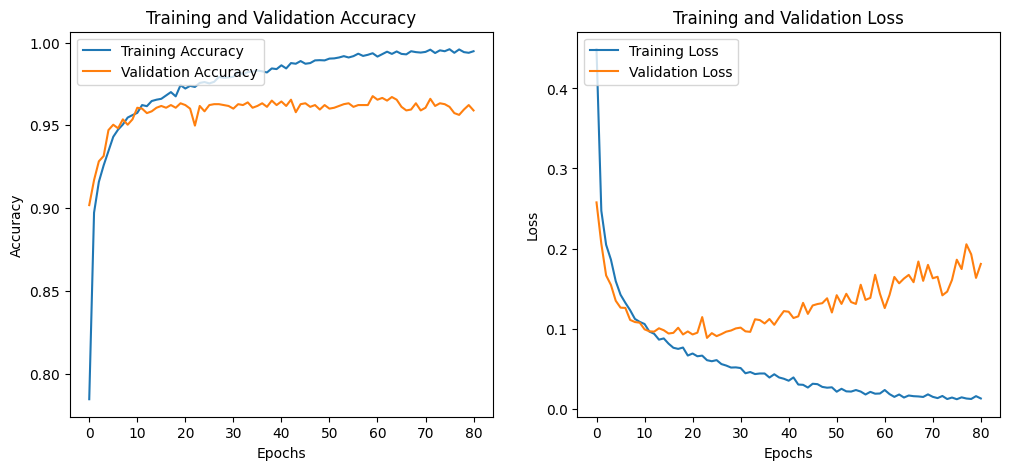

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
plt.show()

**Using Pre-Trained Models**

**ResNet50**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D, PReLU
from tensorflow.keras.applications import ResNet50, VGG16, EfficientNetB0, DenseNet121

# Function to build the model
def build_pretrained_cnn(model_name, input_shape=(32, 32, 3), freeze_layers=True):
    if model_name == 'ResNet50':
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'VGG16':
        base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'EfficientNetB0':
        base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'DenseNet121':
        base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
    else:
        raise ValueError("Invalid model name")

    if freeze_layers:
        for layer in base_model.layers:
            layer.trainable = False

    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)  # Feature extraction

    x = Dense(128)(x)
    x = PReLU()(x)

    outputs = Dense(1, activation='sigmoid')(x)  # Binary classification

    model = Model(inputs, outputs)
    return model

# Example: Build model using ResNet50
model = build_pretrained_cnn('ResNet50')
model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 1, 1, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu (PReLU)                      │ (None, 128)                 │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,850,241 (90.98 MB)

 Trainable params: 262,529 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8111 - loss: 0.4671 - val_accuracy: 0.8916 - val_loss: 0.2640
Epoch 2/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9132 - loss: 0.2052 - val_accuracy: 0.9094 - val_loss: 0.2270
Epoch 3/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9331 - loss: 0.1621 - val_accuracy: 0.9148 - val_loss: 0.2130
Epoch 4/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9469 - loss: 0.1358 - val_accuracy: 0.9175 - val_loss: 0.2056
Epoch 5/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9580 - loss: 0.1160 - val_accuracy: 0.9196 - val_loss: 0.2024
Epoch 6/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9645 - loss: 0.1007 - val_accuracy: 0.9213 - val_loss: 0.2006
Epoch 7/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9708 - loss: 0.0882 - val_accuracy: 0.9207 - val_loss: 0.2016
Epoch 8/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9753 - loss: 0.0777 -

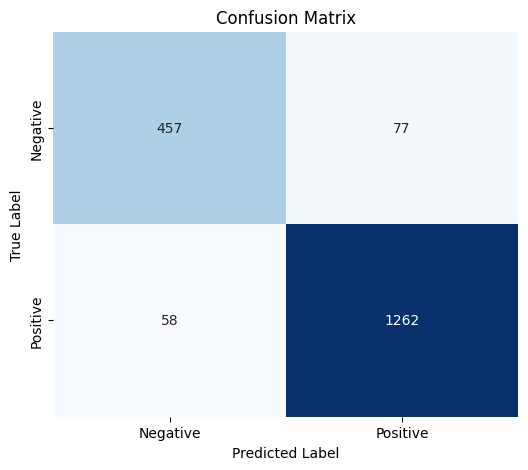

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Get all images and labels as NumPy arrays
X_train, y_train = [], []
for images, labels in train_dataset.as_numpy_iterator():
    X_train.extend(images)
    y_train.extend(labels)

X_train = np.array(X_train)
y_train = np.array(y_train)

# Get all test images and labels as NumPy arrays
X_test, y_test = [], []
for images, labels in test_dataset.as_numpy_iterator():
    X_test.extend(images)
    y_test.extend(labels)

X_test = np.array(X_test)
y_test = np.array(y_test)

# Define optimizer
optimizer = Adam(learning_rate=0.0001)

# Initialize callbacks
early_stopping = EarlyStopping(monitor="accuracy", patience=5, restore_best_weights=True)

# Create TensorFlow Datasets
train_dataset_tf = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
test_dataset_tf = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

# Compile model
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(
    train_dataset_tf,
    validation_data=test_dataset_tf,
    epochs=100,
    callbacks=[early_stopping]
)

# Get training metrics
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Evaluate on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-score: {f1:.4f}")

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'],
            cbar=False)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


**VGG16**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D, PReLU
from tensorflow.keras.applications import ResNet50, VGG16, EfficientNetB0, DenseNet121

# Function to build the model
def build_pretrained_cnn(model_name, input_shape=(32, 32, 3), freeze_layers=True):
    if model_name == 'ResNet50':
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'VGG16':
        base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'EfficientNetB0':
        base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'DenseNet121':
        base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
    else:
        raise ValueError("Invalid model name")

    if freeze_layers:
        for layer in base_model.layers:
            layer.trainable = False

    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)  # Feature extraction

    x = Dense(128)(x)
    x = PReLU()(x)

    outputs = Dense(1, activation='sigmoid')(x)  # Binary classification

    model = Model(inputs, outputs)
    return model

# Example: Build model using VGG16
model = build_pretrained_cnn('VGG16')
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_8 (PReLU)                    │ (None, 128)                 │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,780,609 (56.38 MB)

 Trainable params: 65,921 (257.50 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.6163 - loss: 4.3532 - val_accuracy: 0.8576 - val_loss: 0.7024
Epoch 2/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8632 - loss: 0.6231 - val_accuracy: 0.8781 - val_loss: 0.4917
Epoch 3/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8942 - loss: 0.4207 - val_accuracy: 0.8916 - val_loss: 0.3999
Epoch 4/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9089 - loss: 0.3357 - val_accuracy: 0.9029 - val_loss: 0.3514
Epoch 5/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9169 - loss: 0.2825 - val_accuracy: 0.9110 - val_loss: 0.3229
Epoch 6/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9259 - loss: 0.2441 - val_accuracy: 0.9175 - val_loss: 0.3021
Epoch 7/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9325 - loss: 0.2142 - val_accuracy: 0.9202 - val_loss: 0.2878
Epoch 8/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9394 - loss: 0.1902 

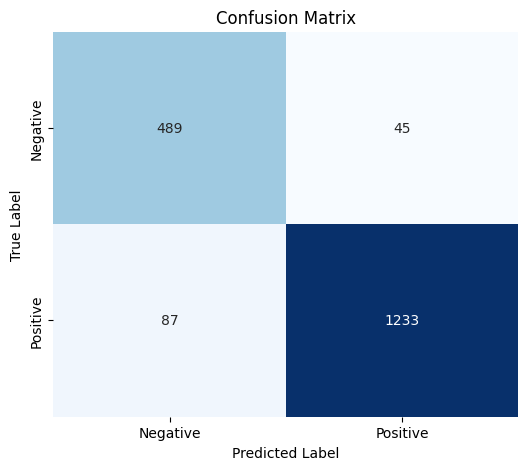

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Get all images and labels as NumPy arrays
X_train, y_train = [], []
for images, labels in train_dataset.as_numpy_iterator():
    X_train.extend(images)
    y_train.extend(labels)

X_train = np.array(X_train)
y_train = np.array(y_train)

# Get all test images and labels as NumPy arrays
X_test, y_test = [], []
for images, labels in test_dataset.as_numpy_iterator():
    X_test.extend(images)
    y_test.extend(labels)

X_test = np.array(X_test)
y_test = np.array(y_test)

# Define optimizer
optimizer = Adam(learning_rate=0.0001)

# Initialize callbacks
early_stopping = EarlyStopping(monitor="accuracy", patience=5, restore_best_weights=True)

# Create TensorFlow Datasets
train_dataset_tf = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
test_dataset_tf = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

# Compile model
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(
    train_dataset_tf,
    validation_data=test_dataset_tf,
    epochs=100,
    callbacks=[early_stopping]
)

# Get training metrics
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Evaluate on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-score: {f1:.4f}")

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'],
            cbar=False)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


**EfficientNetB0**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D, PReLU
from tensorflow.keras.applications import ResNet50, VGG16, EfficientNetB0, DenseNet121

# Function to build the model
def build_pretrained_cnn(model_name, input_shape=(32, 32, 3), freeze_layers=True):
    if model_name == 'ResNet50':
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'VGG16':
        base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'EfficientNetB0':
        base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'DenseNet121':
        base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
    else:
        raise ValueError("Invalid model name")

    if freeze_layers:
        for layer in base_model.layers:
            layer.trainable = False

    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)  # Feature extraction

    x = Dense(128)(x)
    x = PReLU()(x)

    outputs = Dense(1, activation='sigmoid')(x)  # Binary classification

    model = Model(inputs, outputs)
    return model

# Example: Build model using EfficientNetB0
model = build_pretrained_cnn('EfficientNetB0')
model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 1, 1, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_6           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_9 (PReLU)                    │ (None, 128)                 │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,213,796 (16.07 MB)

 Trainable params: 164,225 (641.50 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

Epoch 1/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 40s 81ms/step - accuracy: 0.9014 - loss: 0.2353 - val_accuracy: 0.8927 - val_loss: 0.2476
Epoch 2/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9027 - loss: 0.2300 - val_accuracy: 0.8959 - val_loss: 0.2471
Epoch 3/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9074 - loss: 0.2229 - val_accuracy: 0.8943 - val_loss: 0.2467
Epoch 4/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9074 - loss: 0.2194 - val_accuracy: 0.8948 - val_loss: 0.2495
Epoch 5/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9042 - loss: 0.2312 - val_accuracy: 0.8910 - val_loss: 0.2482
Epoch 6/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9058 - loss: 0.2281 - val_accuracy: 0.8970 - val_loss: 0.2451
Epoch 7/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9075 - loss: 0.2283 - val_accuracy: 0.8948 - val_loss: 0.2462
Epoch 8/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9153 - loss: 0.2135 - v

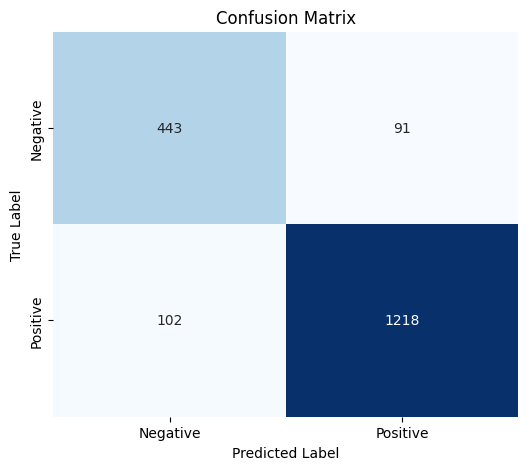

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Get all images and labels as NumPy arrays
X_train, y_train = [], []
for images, labels in train_dataset.as_numpy_iterator():
    X_train.extend(images)
    y_train.extend(labels)

X_train = np.array(X_train)
y_train = np.array(y_train)

# Get all test images and labels as NumPy arrays
X_test, y_test = [], []
for images, labels in test_dataset.as_numpy_iterator():
    X_test.extend(images)
    y_test.extend(labels)

X_test = np.array(X_test)
y_test = np.array(y_test)

# Define optimizer
optimizer = Adam(learning_rate=0.0001)

# Initialize callbacks
early_stopping = EarlyStopping(monitor="accuracy", patience=5, restore_best_weights=True)

# Create TensorFlow Datasets
train_dataset_tf = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
test_dataset_tf = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

# Compile model
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(
    train_dataset_tf,
    validation_data=test_dataset_tf,
    epochs=100,
    callbacks=[early_stopping]
)

# Get training metrics
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Evaluate on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-score: {f1:.4f}")

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'],
            cbar=False)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


**DenseNet121**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D, PReLU
from tensorflow.keras.applications import ResNet50, VGG16, EfficientNetB0, DenseNet121

# Function to build the model
def build_pretrained_cnn(model_name, input_shape=(32, 32, 3), freeze_layers=True):
    if model_name == 'ResNet50':
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'VGG16':
        base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'EfficientNetB0':
        base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'DenseNet121':
        base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
    else:
        raise ValueError("Invalid model name")

    if freeze_layers:
        for layer in base_model.layers:
            layer.trainable = False

    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)  # Feature extraction

    x = Dense(128)(x)
    x = PReLU()(x)

    outputs = Dense(1, activation='sigmoid')(x)  # Binary classification

    model = Model(inputs, outputs)
    return model

# Example: Build model using DenseNet121
model = build_pretrained_cnn('DenseNet121')
model.summary()


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ densenet121 (Functional)             │ (None, 1, 1, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_1 (PReLU)                    │ (None, 128)                 │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,168,961 (27.35 MB)

 Trainable params: 131,457 (513.50 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

Epoch 1/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 54s 122ms/step - accuracy: 0.9871 - loss: 0.0450 - val_accuracy: 0.9083 - val_loss: 0.2991
Epoch 2/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9862 - loss: 0.0482 - val_accuracy: 0.9040 - val_loss: 0.3315
Epoch 3/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9841 - loss: 0.0516 - val_accuracy: 0.8986 - val_loss: 0.3607
Epoch 4/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9798 - loss: 0.0562 - val_accuracy: 0.8975 - val_loss: 0.3871
Epoch 5/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9738 - loss: 0.0646 - val_accuracy: 0.8981 - val_loss: 0.3856
Epoch 6/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9685 - loss: 0.0754 - val_accuracy: 0.9061 - val_loss: 0.3401
58/58 ━━━━━━━━━━━━━━━━━━━━ 22s 192ms/step
Training Accuracy: 0.9760
Validation Accuracy: 0.9061
Test Accuracy: 0.9083
Test Precision: 0.9032
Test Recall: 0.9758
Test F1-score: 0.9381


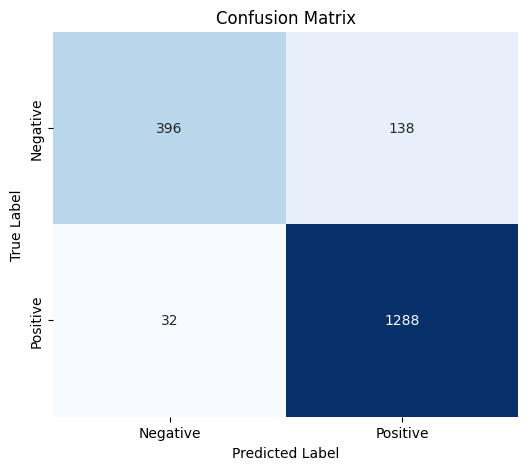

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Get all images and labels as NumPy arrays
X_train, y_train = [], []
for images, labels in train_dataset.as_numpy_iterator():
    X_train.extend(images)
    y_train.extend(labels)

X_train = np.array(X_train)
y_train = np.array(y_train)

# Get all test images and labels as NumPy arrays
X_test, y_test = [], []
for images, labels in test_dataset.as_numpy_iterator():
    X_test.extend(images)
    y_test.extend(labels)

X_test = np.array(X_test)
y_test = np.array(y_test)

# Define optimizer
optimizer = Adam(learning_rate=0.0001)

# Initialize callbacks
early_stopping = EarlyStopping(monitor="accuracy", patience=5, restore_best_weights=True)

# Create TensorFlow Datasets
train_dataset_tf = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
test_dataset_tf = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

# Compile model
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(
    train_dataset_tf,
    validation_data=test_dataset_tf,
    epochs=100,
    callbacks=[early_stopping]
)

# Get training metrics
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Evaluate on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-score: {f1:.4f}")

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'],
            cbar=False)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
